<a href="https://colab.research.google.com/github/MehrdadJalali-AI/SOCIAL-OPTIMIZATION/blob/main/PlotResults_Social.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount drive
from google.colab import drive
import os

drive.mount('/content/drive')
# Change working path
os.chdir('/content/drive/MyDrive/Research/Research_SRH/SOCIAL')

Mounted at /content/drive


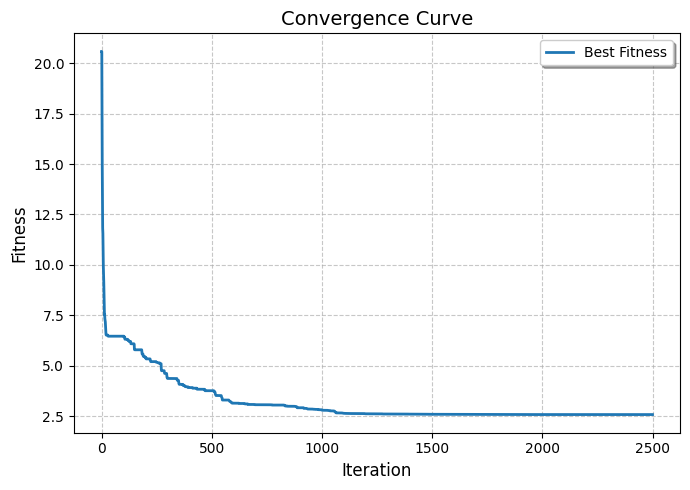

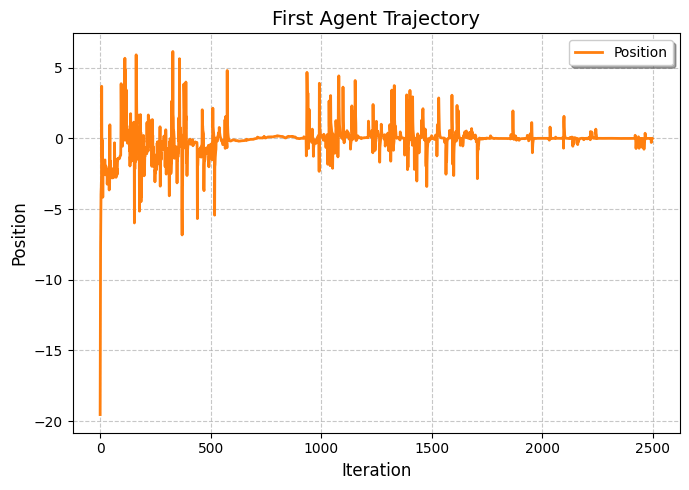

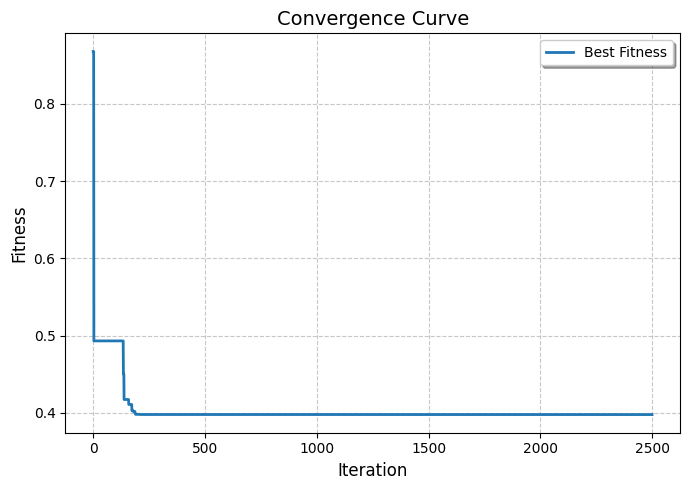

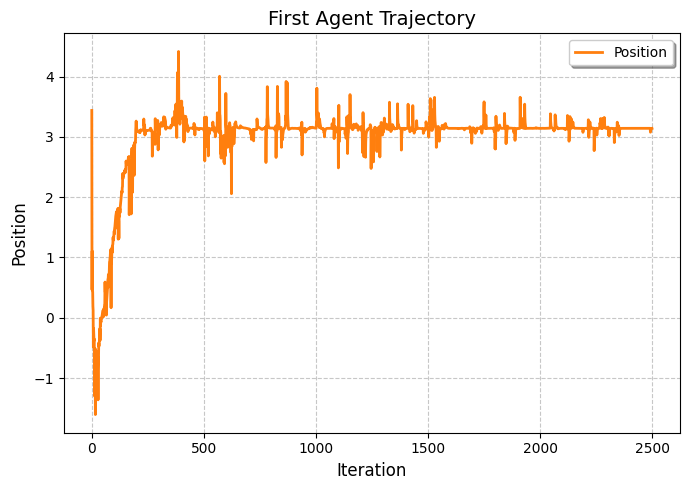

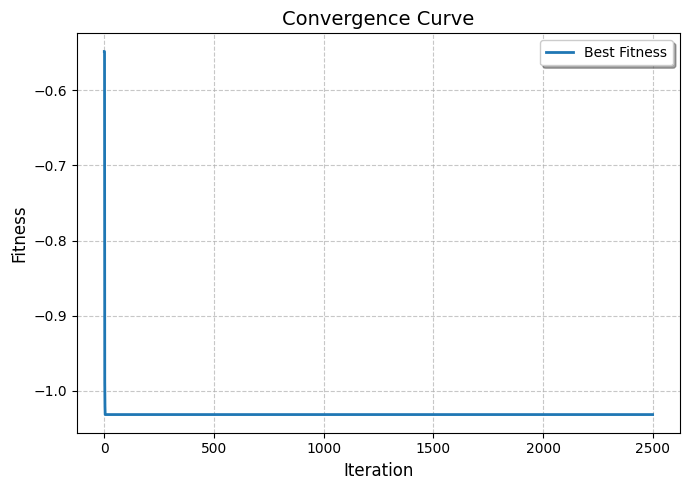

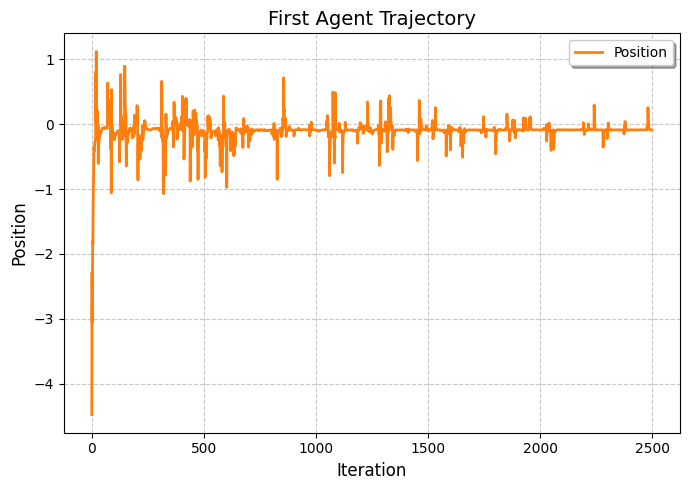

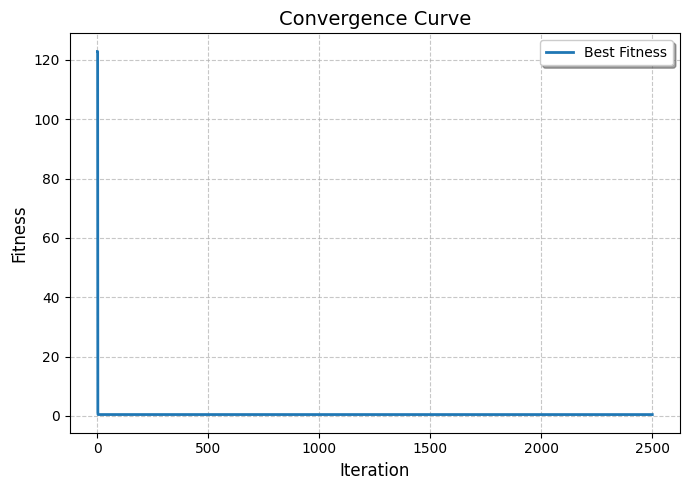

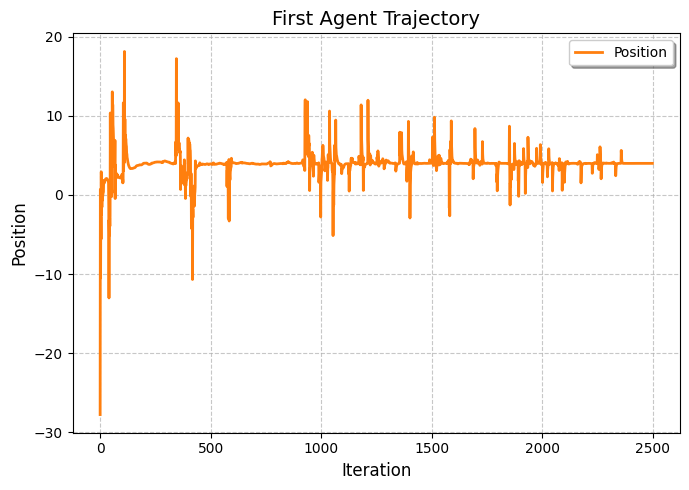

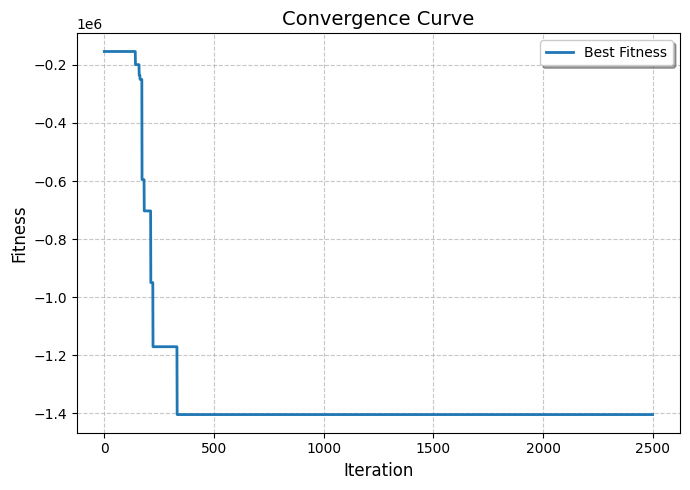

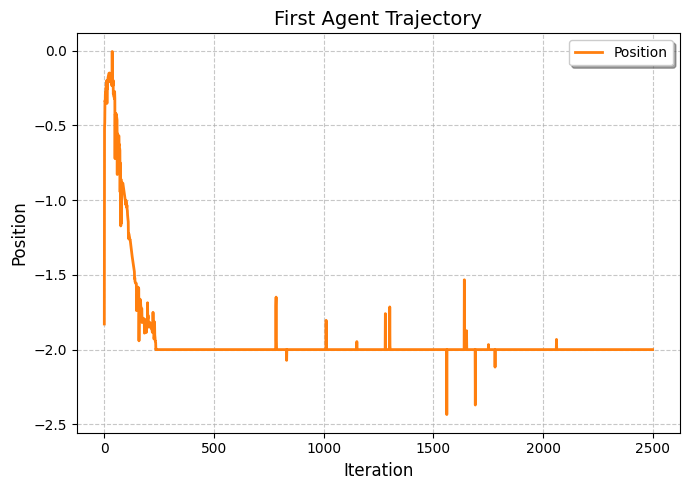

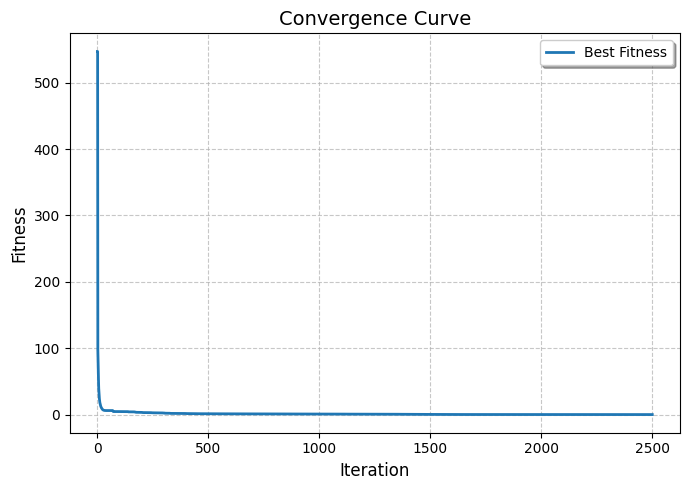

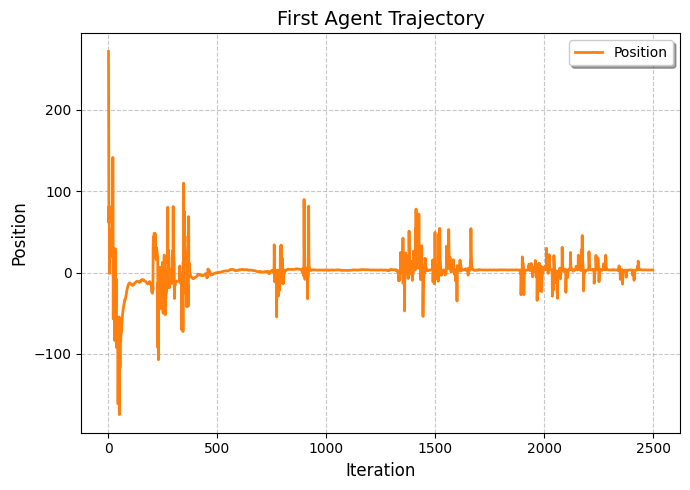

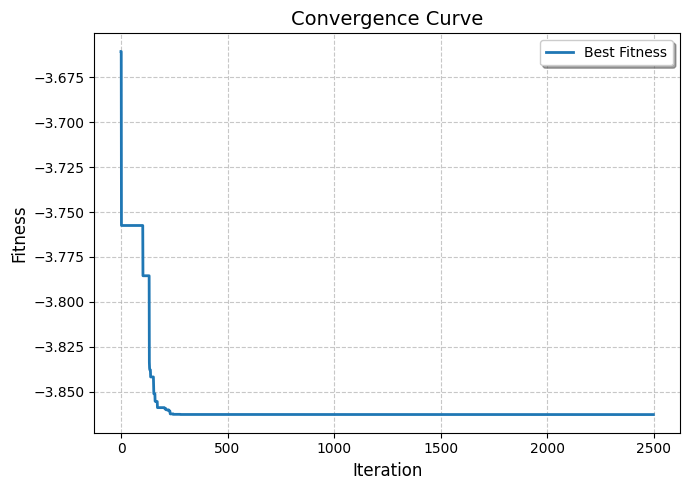

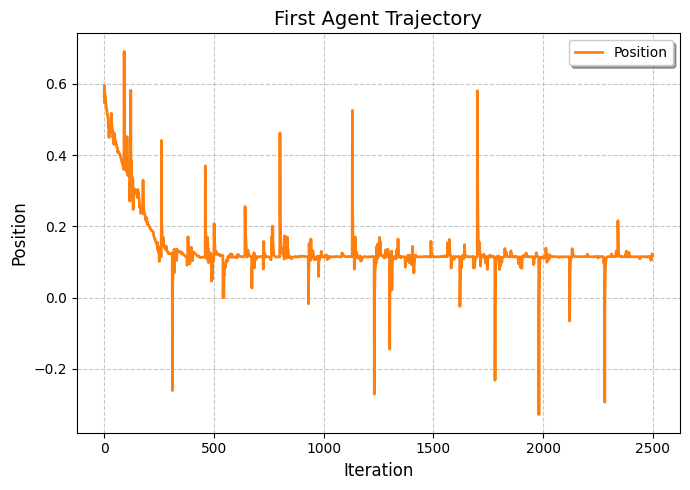

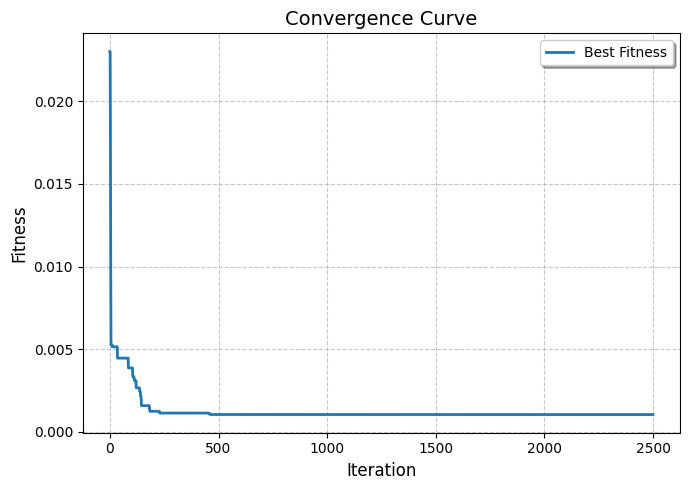

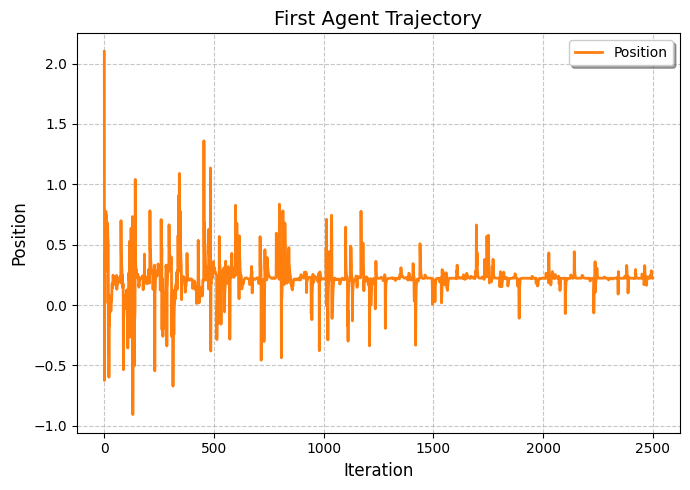

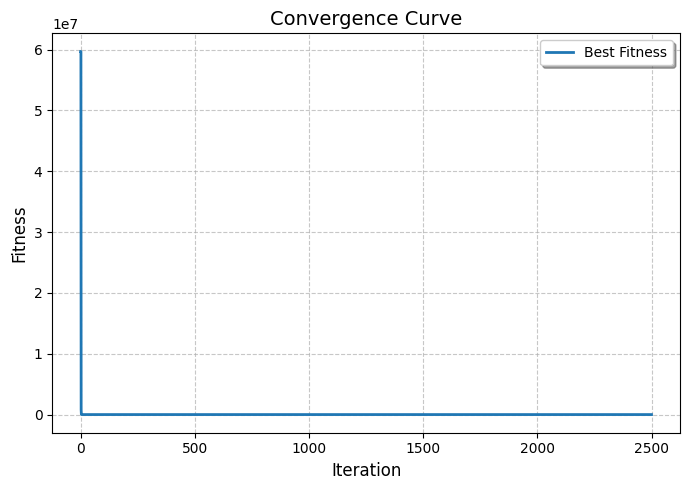

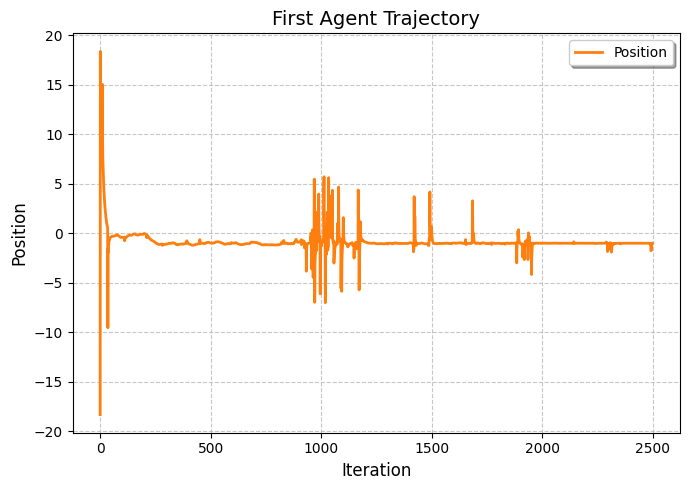

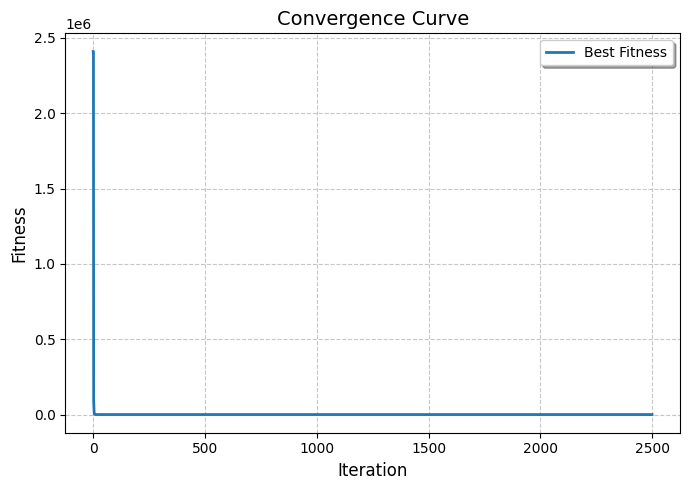

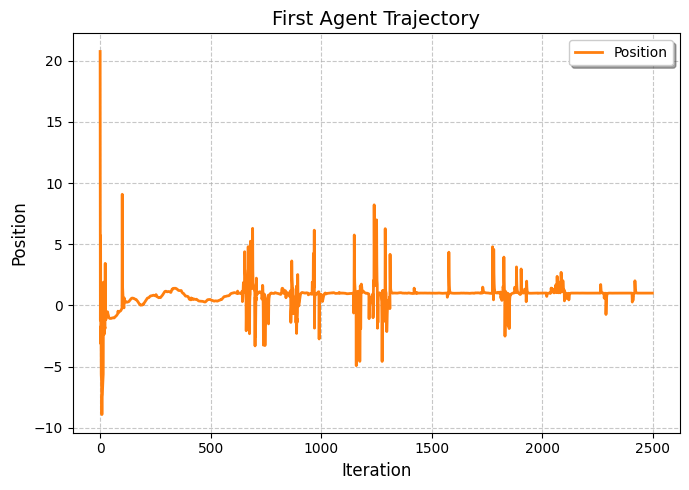

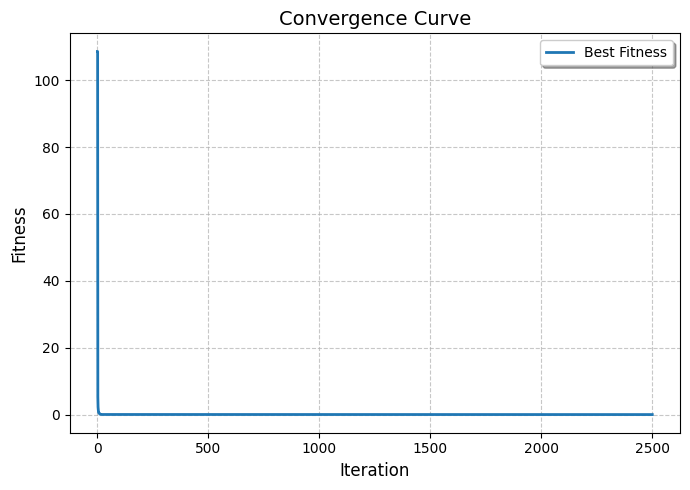

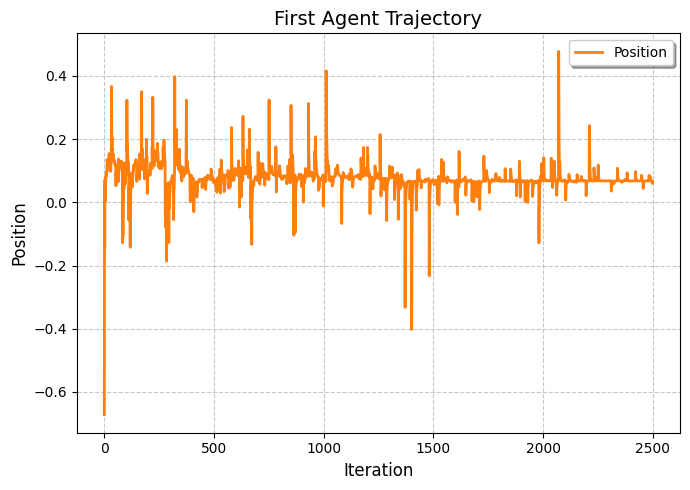

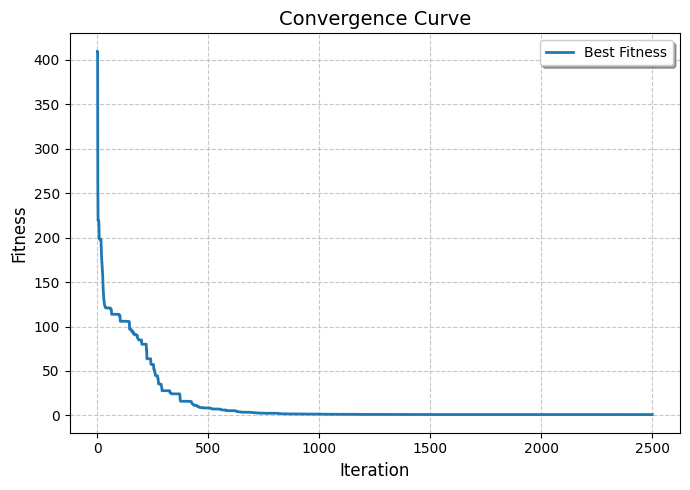

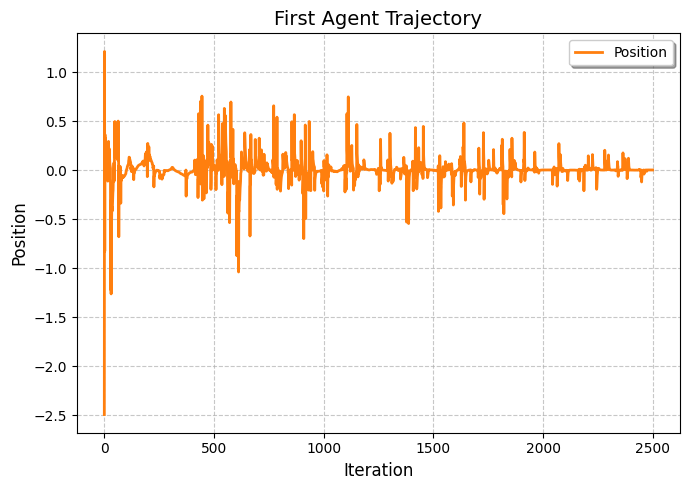

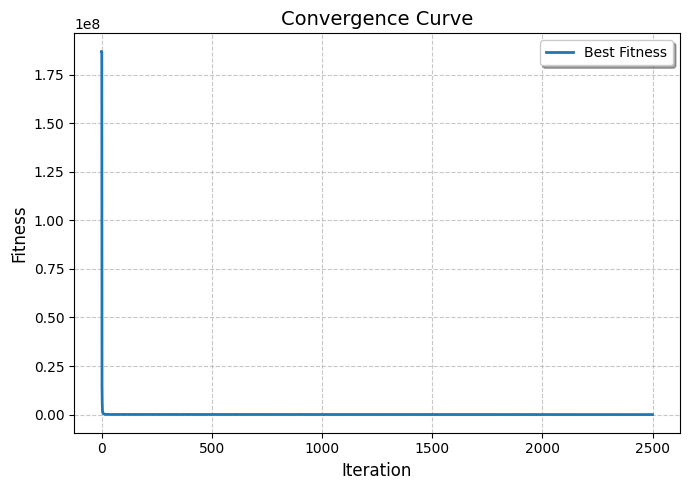

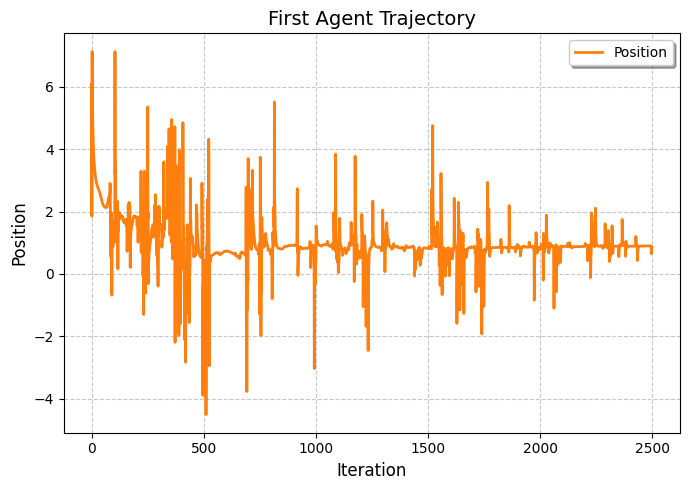

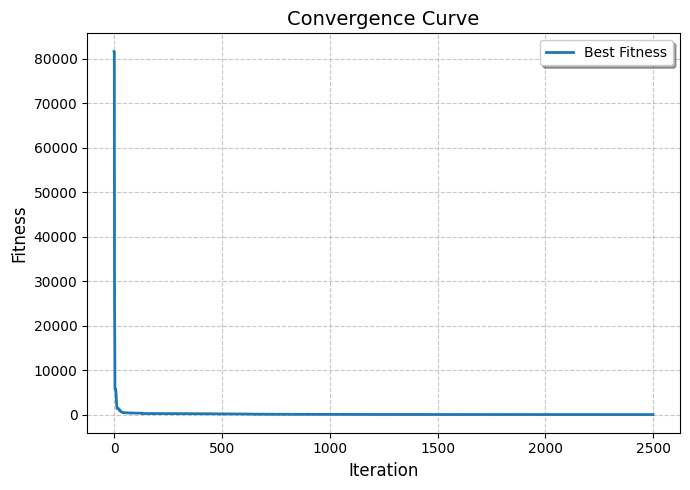

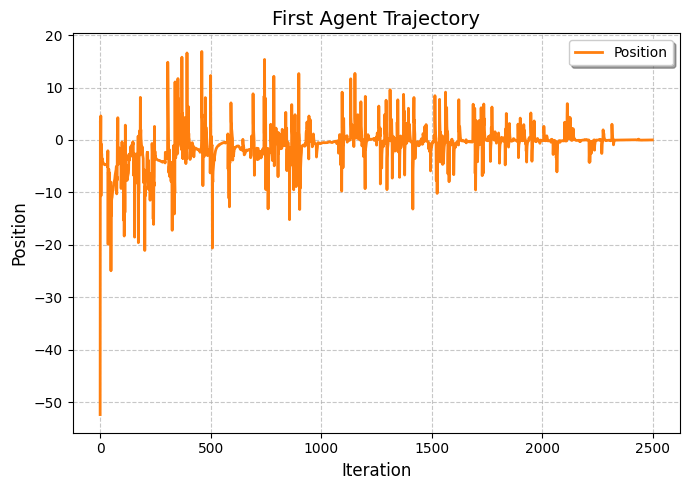

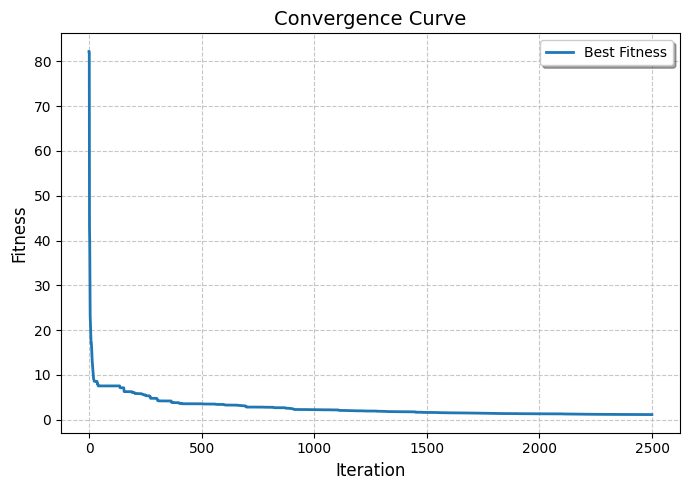

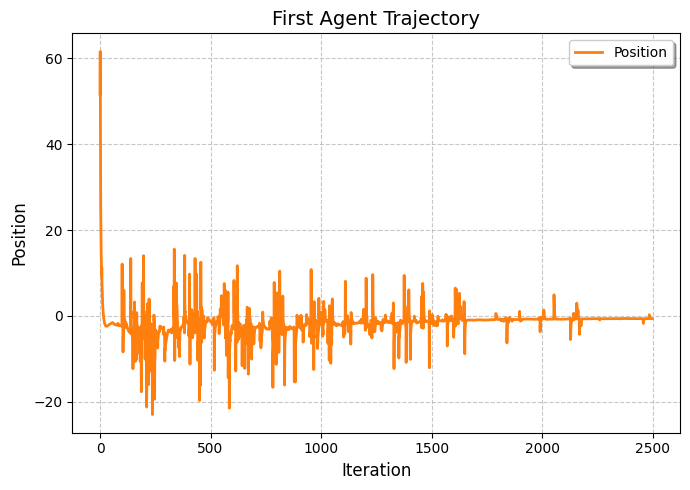

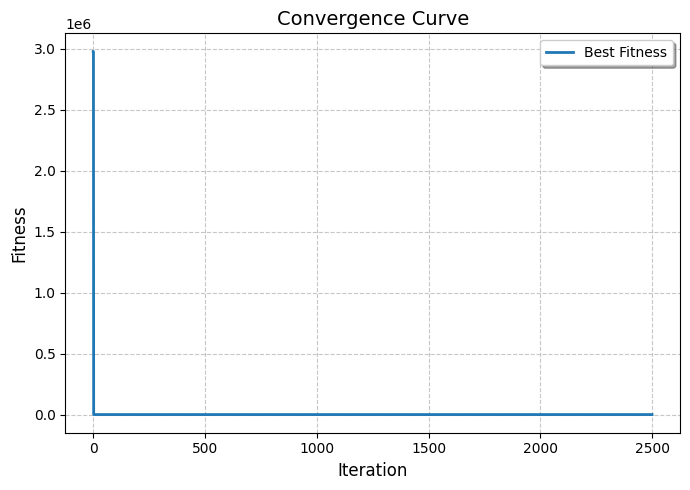

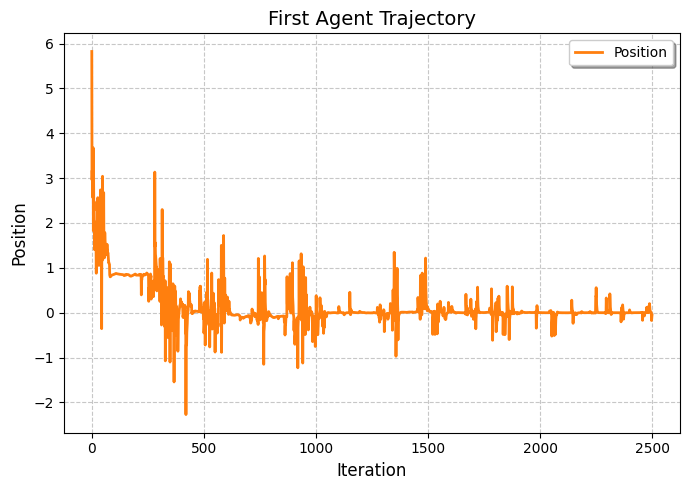

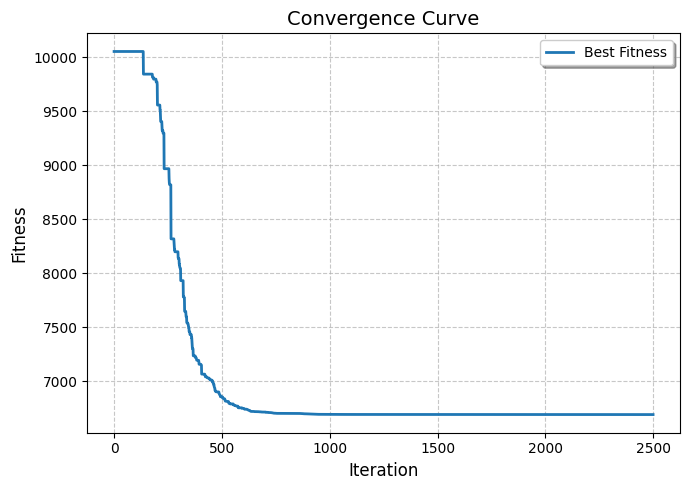

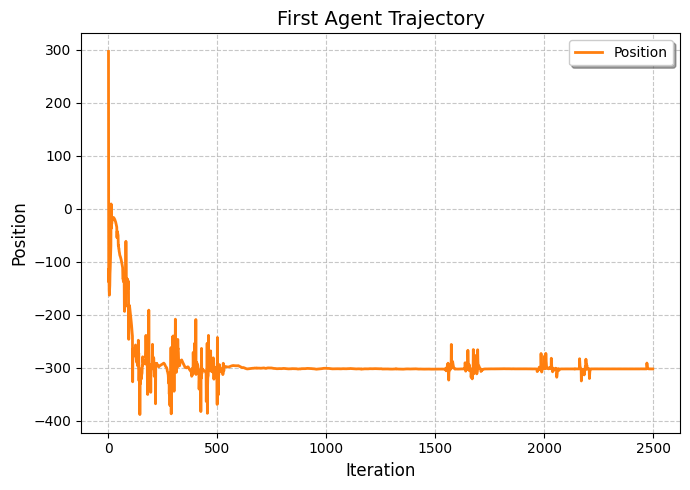

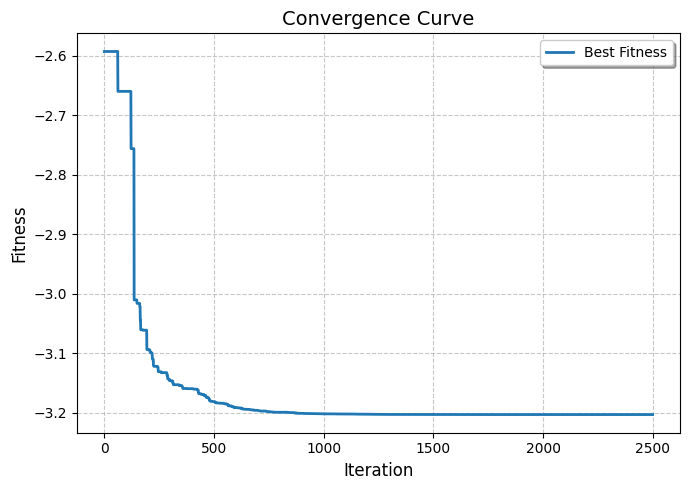

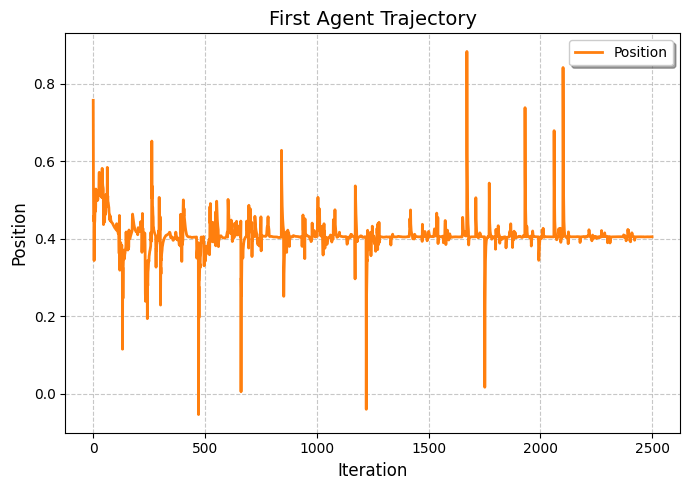

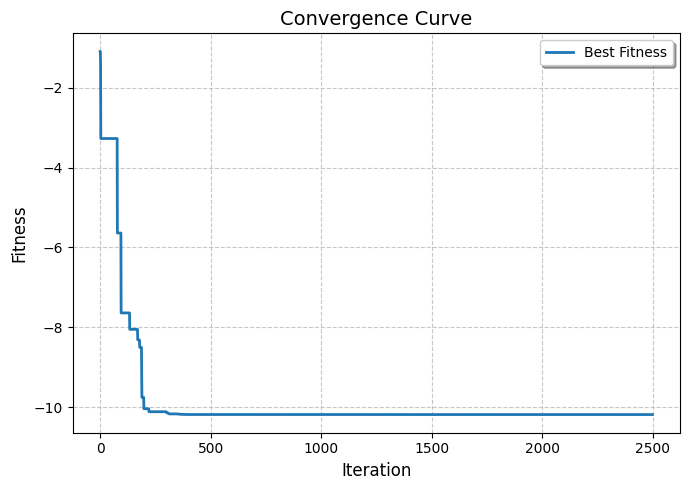

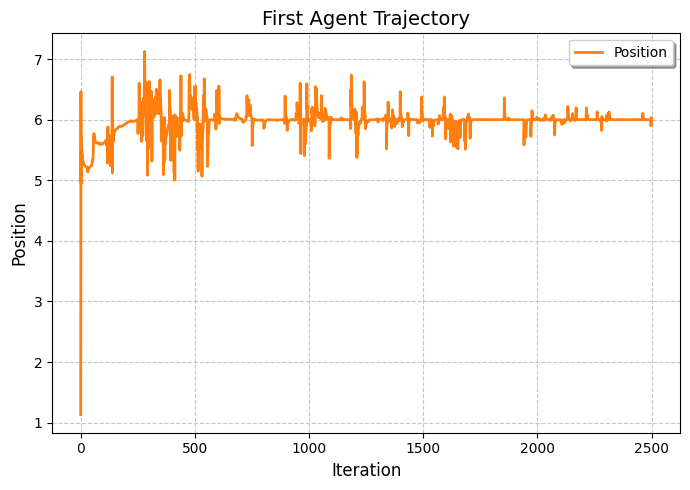

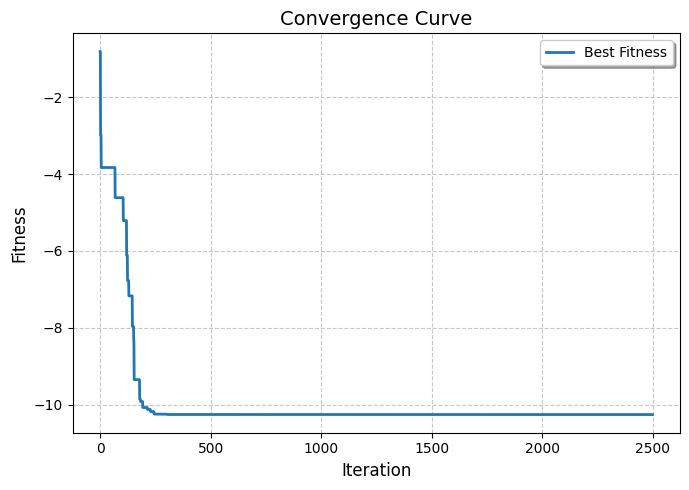

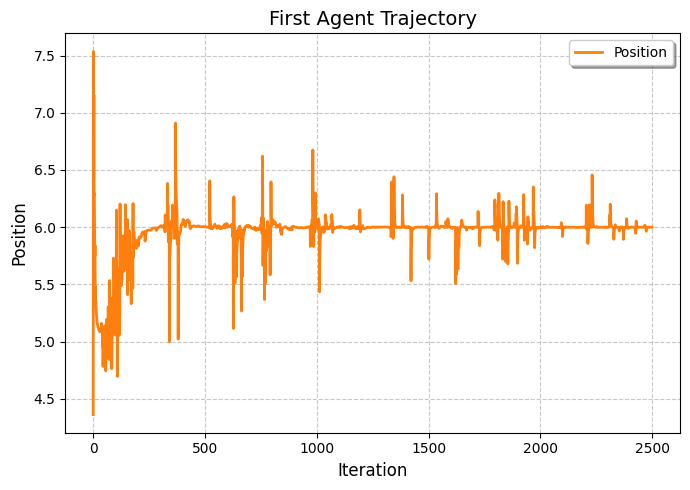

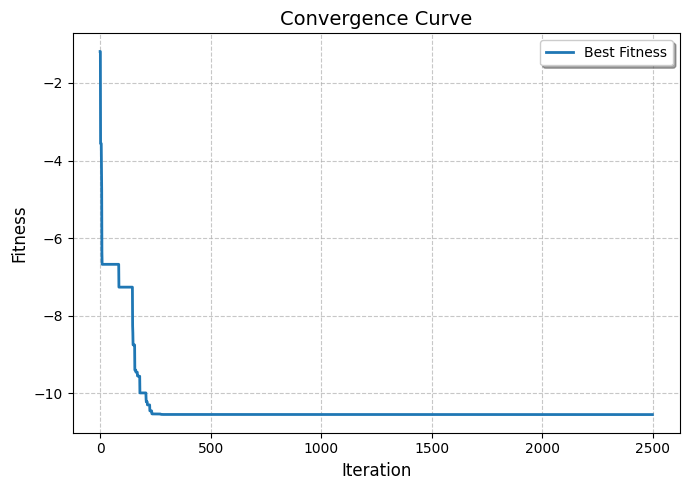

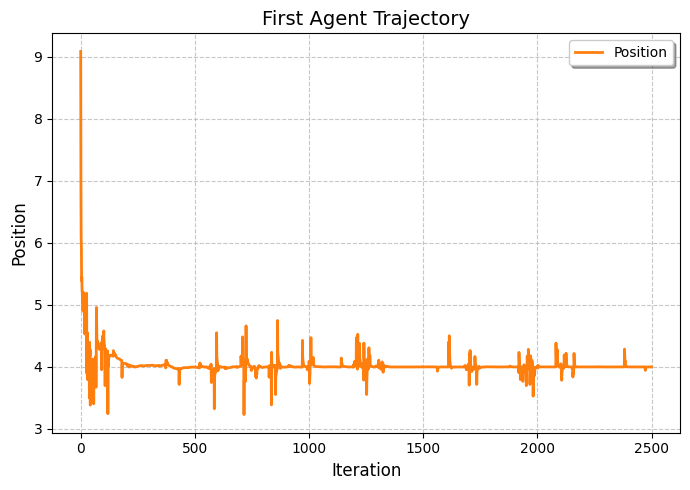

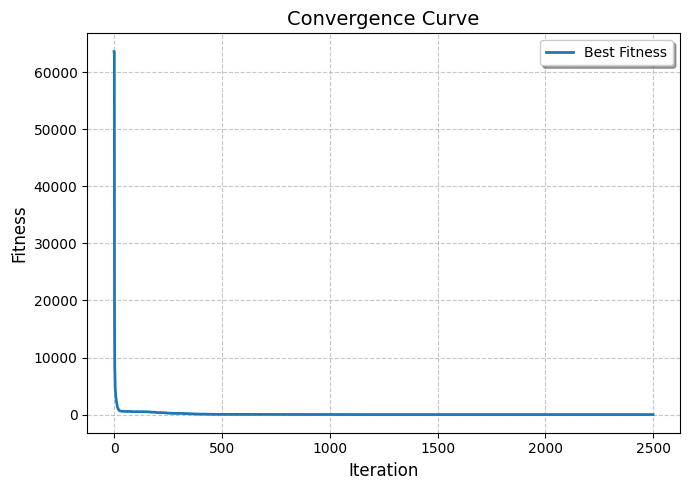

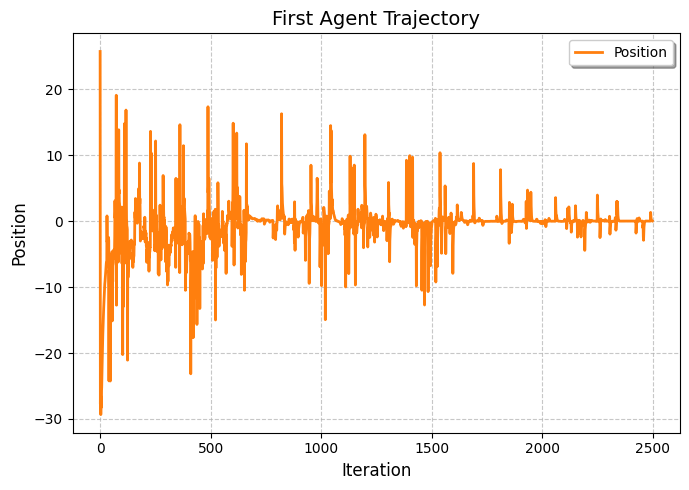

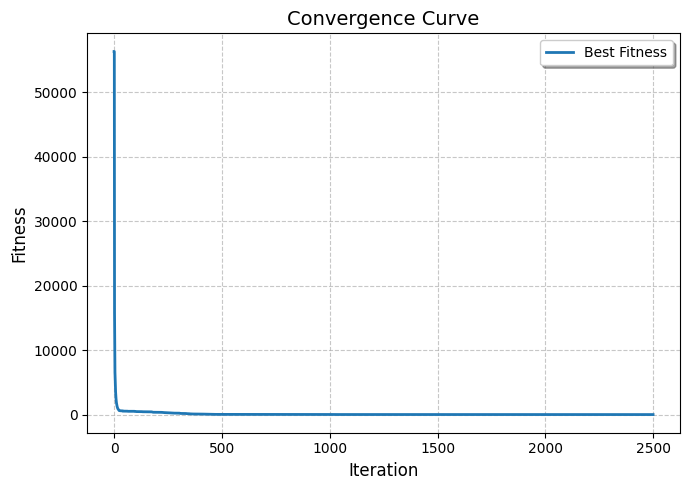

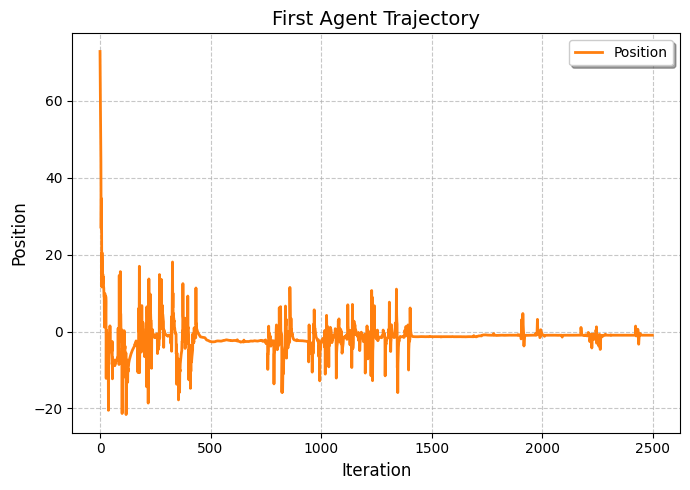

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Matplotlib style to default for compatibility
plt.style.use('default')

# Define a modern color palette
COLOR_CONVERGENCE = '#1f77b4'  # Blue for convergence
COLOR_TRAJECTORY = '#ff7f0e'   # Orange for trajectory
FONT_SIZE_TITLE = 14
FONT_SIZE_LABEL = 12
FONT_SIZE_LEGEND = 10

# Base folder containing F1 to F23 subfolders
base_dir = "qualitative_results"

# Go through each function folder
for func_name in sorted(os.listdir(base_dir)):
    func_path = os.path.join(base_dir, func_name)
    if not os.path.isdir(func_path):
        continue

    try:
        # Paths to CSVs
        conv_path = os.path.join(func_path, "convergence.csv")
        traj_path = os.path.join(func_path, "first_agent_trajectory.csv")

        # Load data
        convergence = pd.read_csv(conv_path)
        trajectory = pd.read_csv(traj_path)

        # Plot 1: Convergence Curve
        fig1, ax1 = plt.subplots(figsize=(7, 5), dpi=100)
        ax1.plot(
            convergence['Iteration'],
            convergence['Best_Fitness'],
            color=COLOR_CONVERGENCE,
            linewidth=2,
            label='Best Fitness'
        )
        ax1.set_title("Convergence Curve", fontsize=FONT_SIZE_TITLE, weight='medium')
        ax1.set_xlabel("Iteration", fontsize=FONT_SIZE_LABEL)
        ax1.set_ylabel("Fitness", fontsize=FONT_SIZE_LABEL)
        ax1.legend(fontsize=FONT_SIZE_LEGEND, loc='best', frameon=True, shadow=True)
        ax1.grid(True, linestyle='--', alpha=0.7)

        # Save Convergence Plot
        conv_plot_path = os.path.join(func_path, f"{func_name}_convergence.png")
        plt.tight_layout()
        plt.savefig(conv_plot_path, dpi=300, bbox_inches='tight', format='png')
        plt.show()
        plt.close(fig1)

        # Plot 2: First Agent Trajectory
        fig2, ax2 = plt.subplots(figsize=(7, 5), dpi=100)
        ax2.set_title("First Agent Trajectory", fontsize=FONT_SIZE_TITLE, weight='medium')
        ax2.set_xlabel("Iteration", fontsize=FONT_SIZE_LABEL)
        ax2.set_ylabel("Position", fontsize=FONT_SIZE_LABEL)

        if 'Position' in trajectory.columns:
            if trajectory['Position'].dtype == 'O':  # Check if list as string
                import ast
                trajectory['Position'] = trajectory['Position'].apply(ast.literal_eval)
                pos_df = pd.DataFrame(trajectory['Position'].tolist())
                # Use a color cycle for multiple dimensions
                colors = sns.color_palette("husl", n_colors=len(pos_df.columns))
                for dim, color in zip(pos_df.columns, colors):
                    ax2.plot(
                        pos_df.index,
                        pos_df[dim],
                        label=f'Dim {dim+1}',
                        color=color,
                        linewidth=2,
                        alpha=0.8
                    )
            else:
                ax2.plot(
                    trajectory['Iteration'],
                    trajectory['Position'],
                    color=COLOR_TRAJECTORY,
                    linewidth=2,
                    label='Position'
                )
        ax2.legend(fontsize=FONT_SIZE_LEGEND, loc='best', frameon=True, shadow=True)
        ax2.grid(True, linestyle='--', alpha=0.7)

        # Save Trajectory Plot
        traj_plot_path = os.path.join(func_path, f"{func_name}_trajectory.png")
        plt.tight_layout()
        plt.savefig(traj_plot_path, dpi=300, bbox_inches='tight', format='png')
        plt.show()
        plt.close(fig2)

    except Exception as e:
        print(f"Error in {func_name}: {e}")

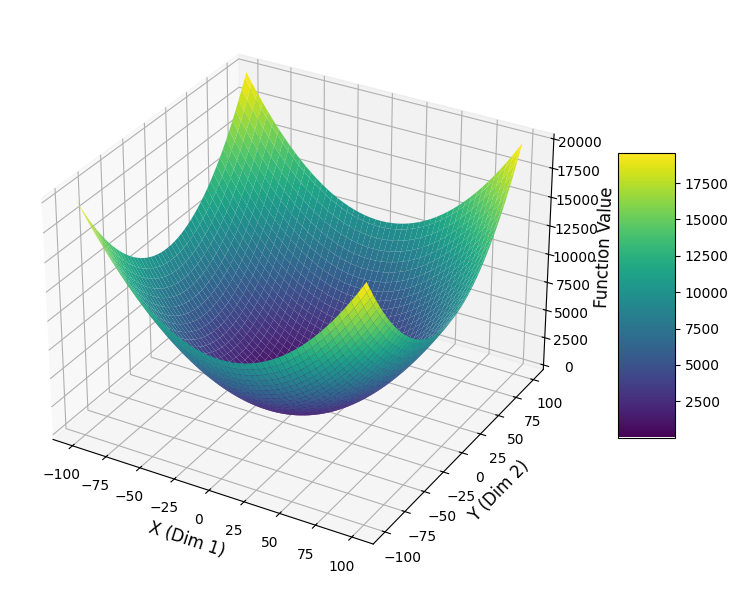

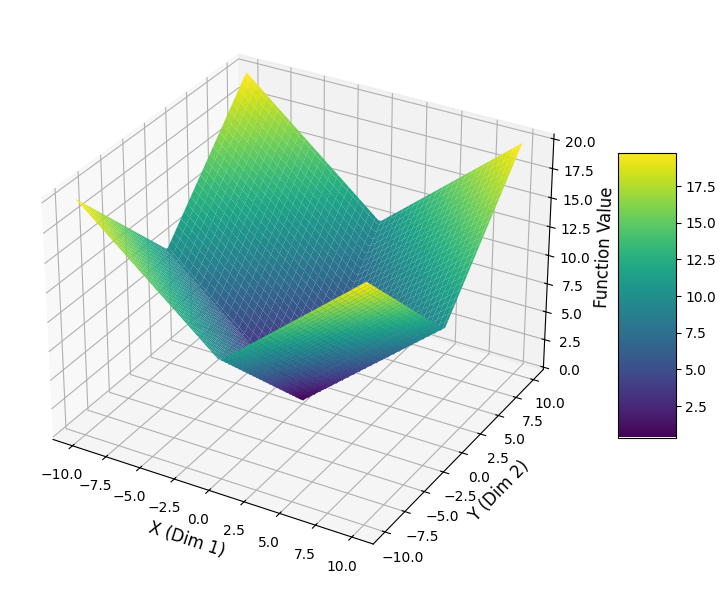

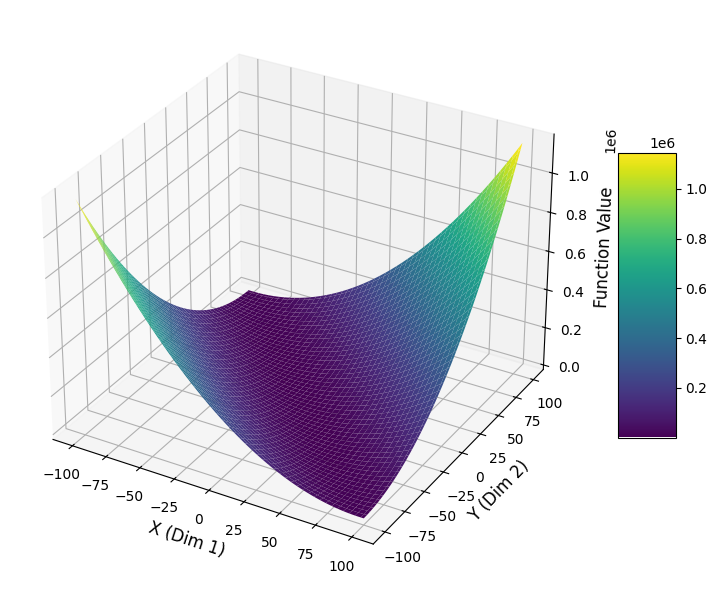

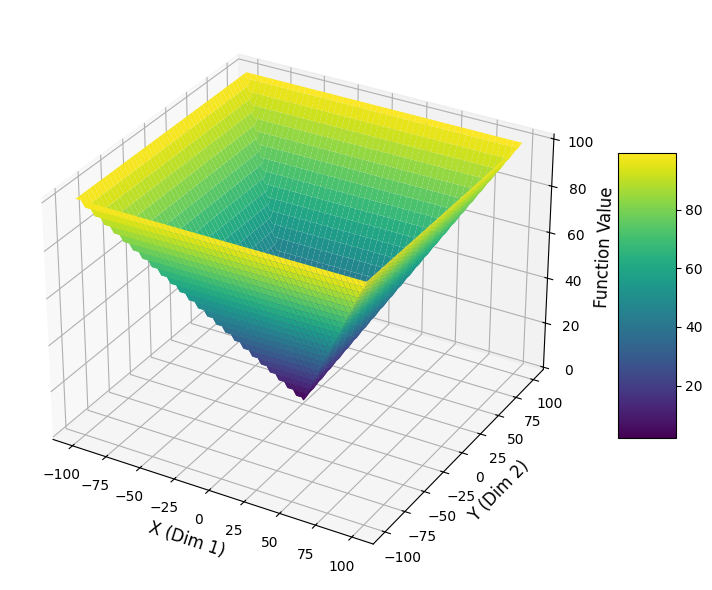

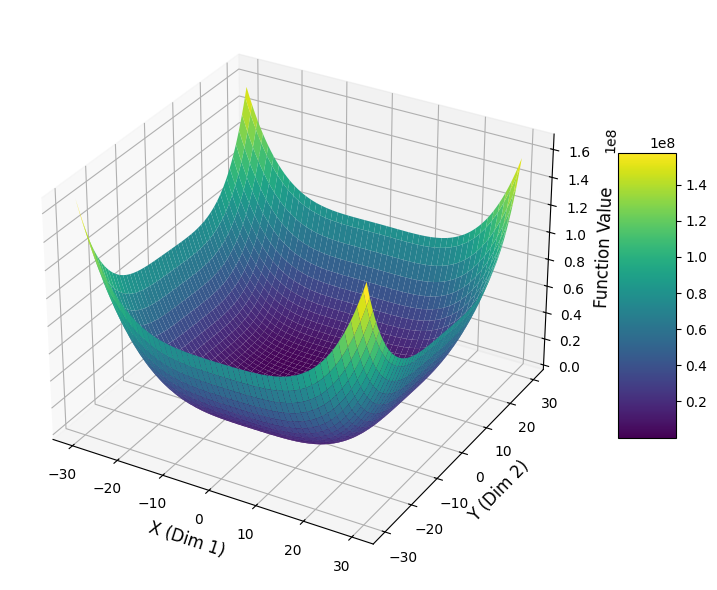

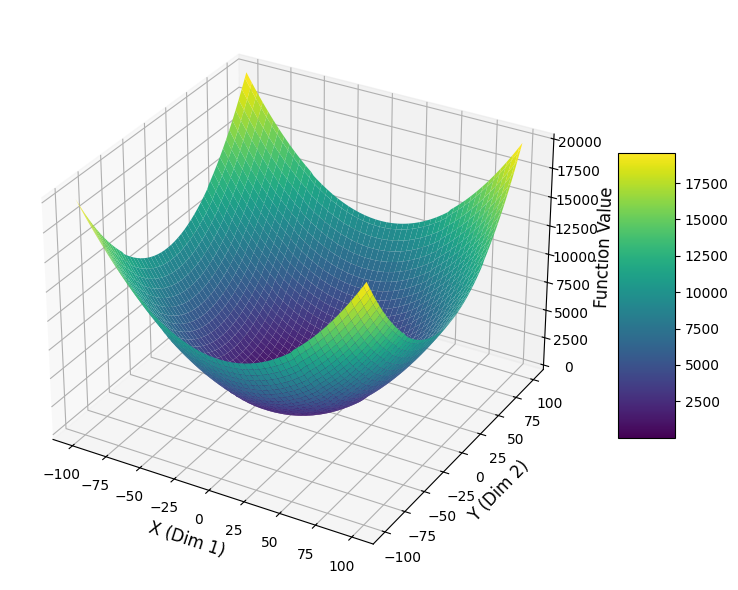

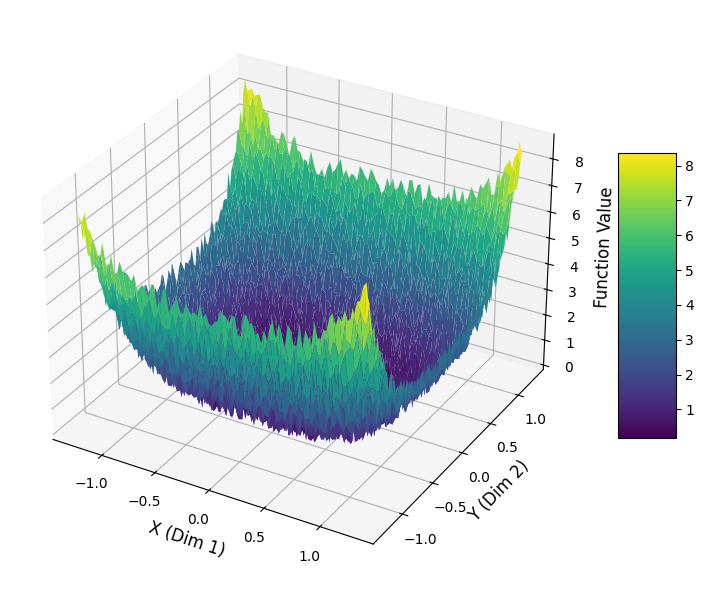

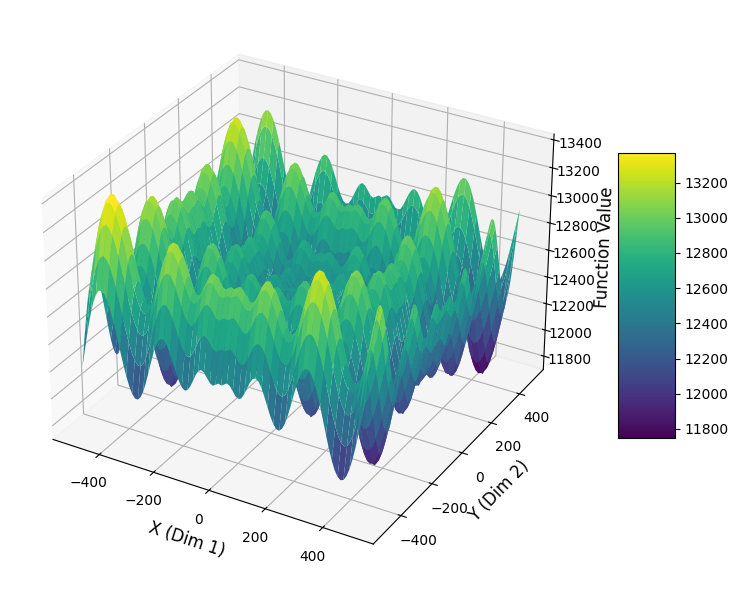

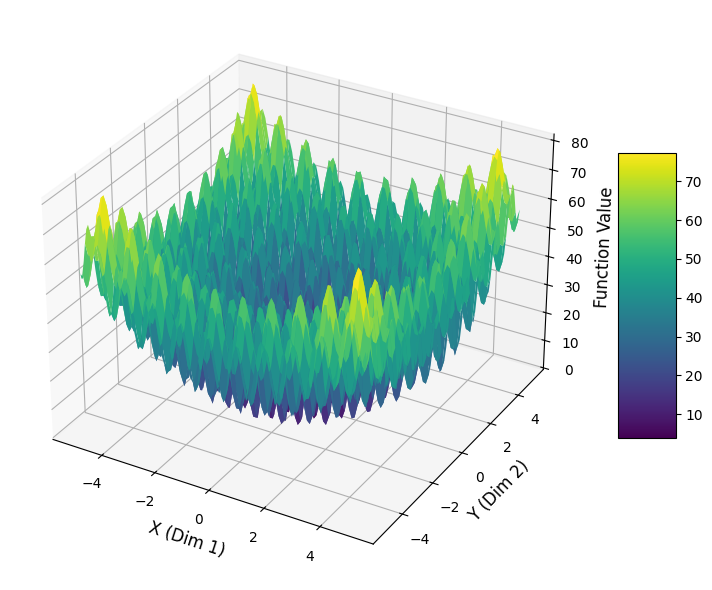

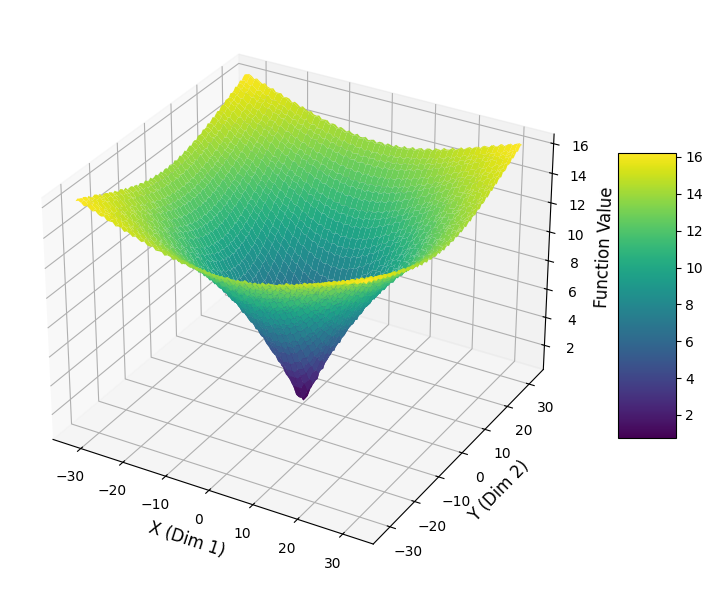

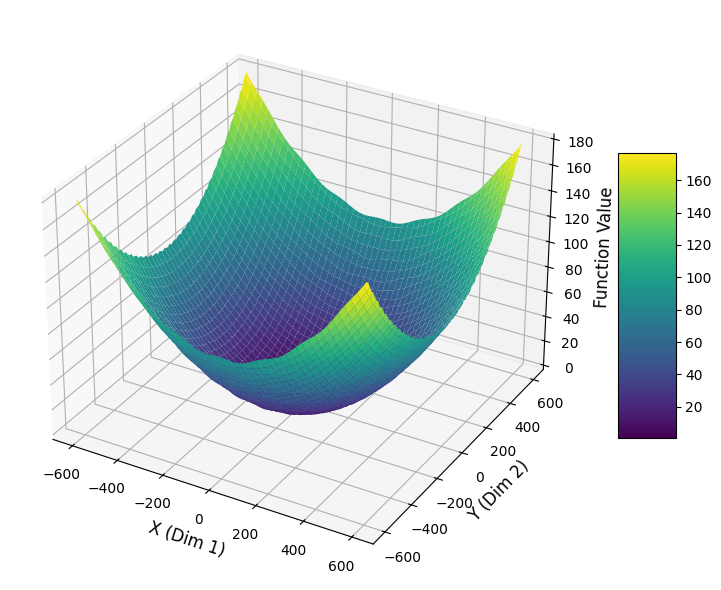

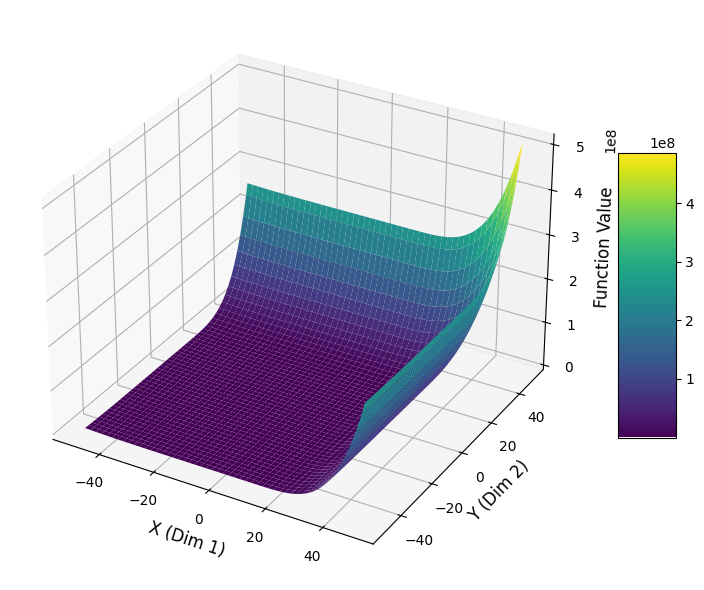

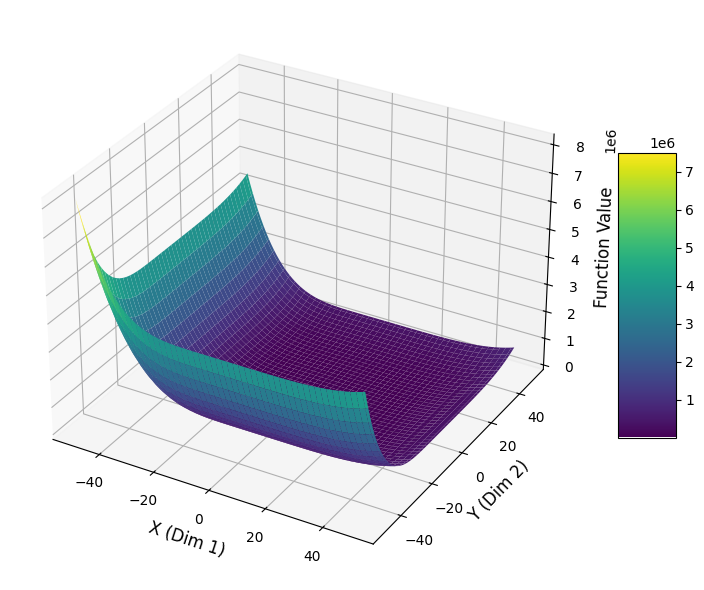

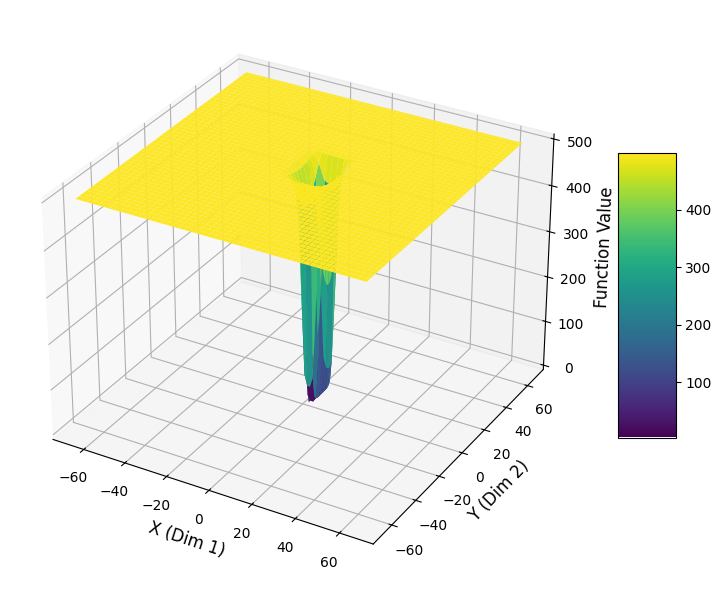

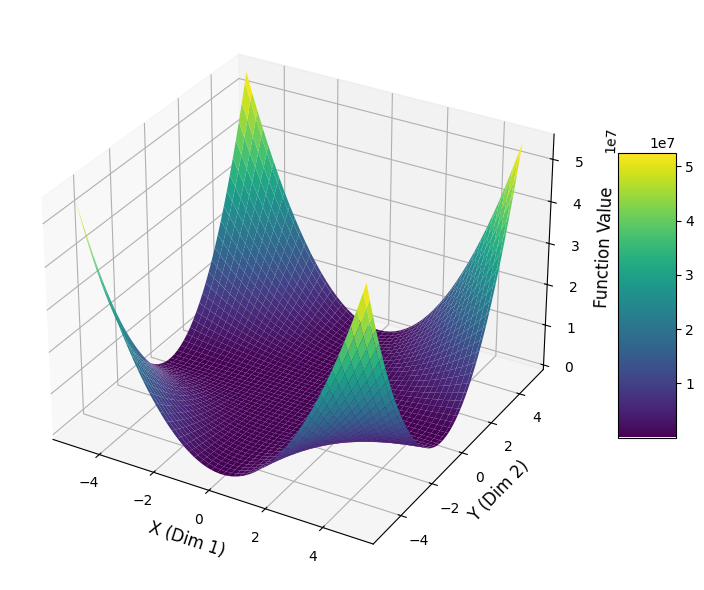

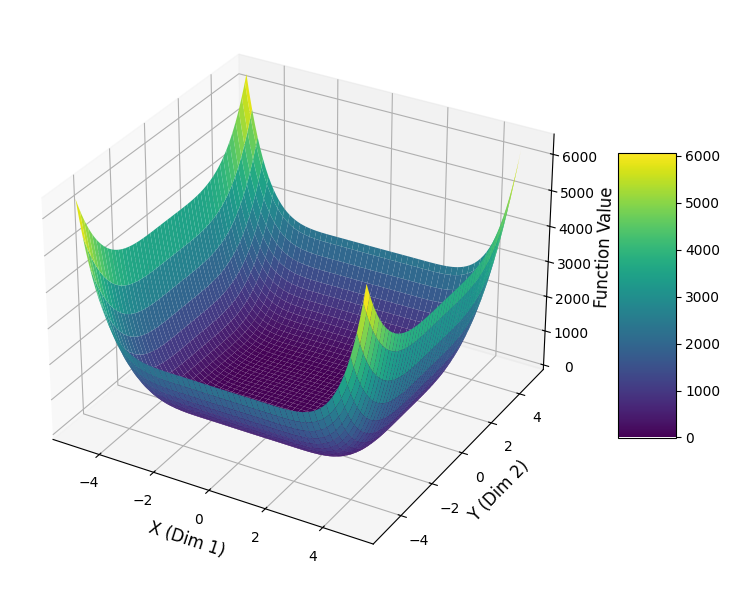

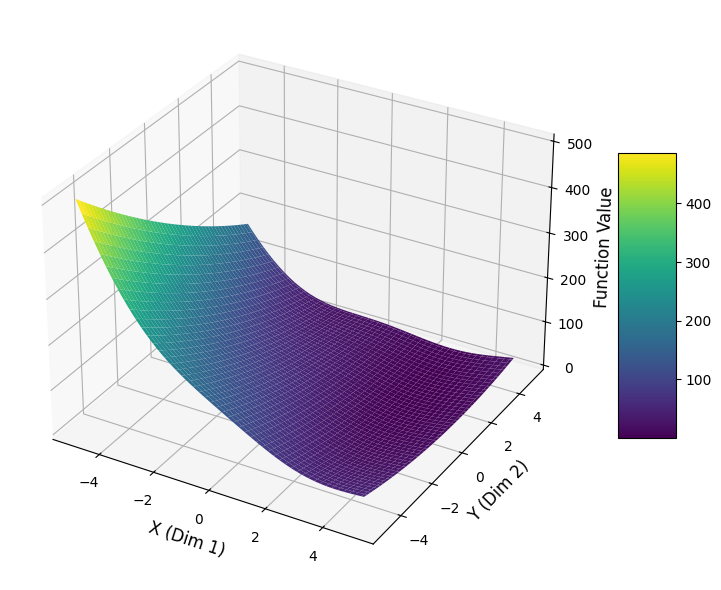

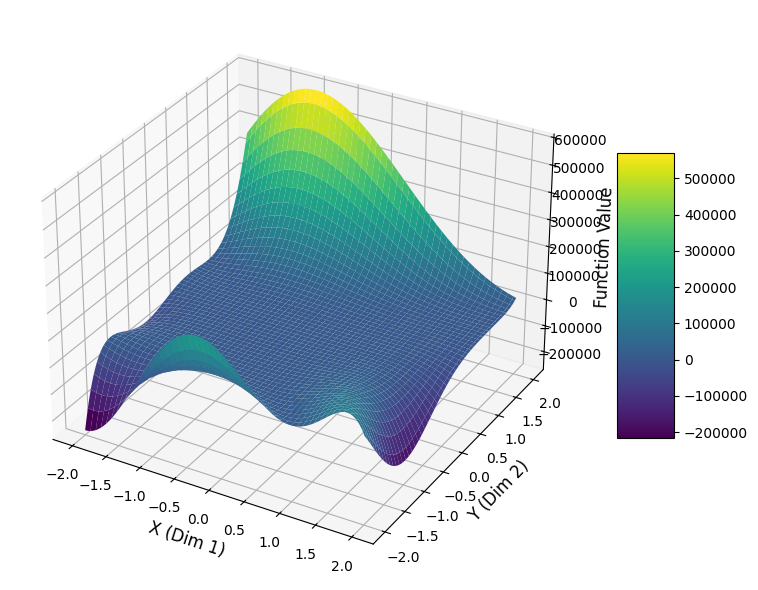

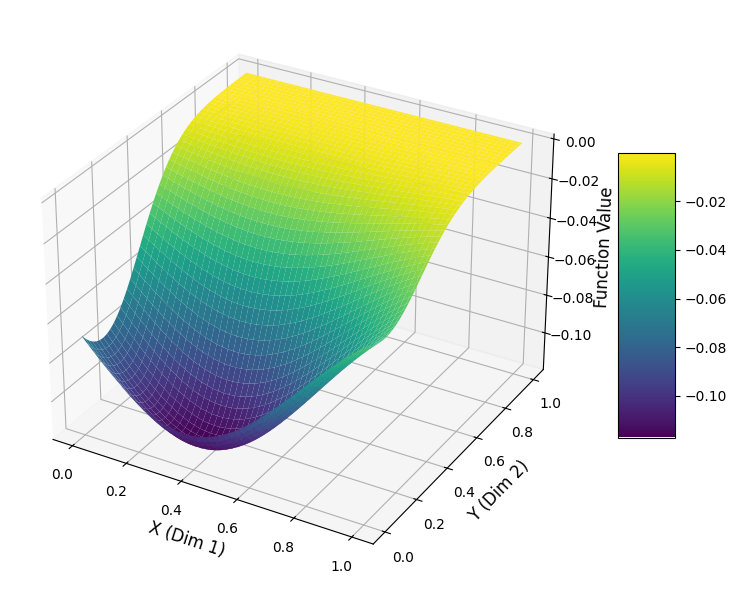

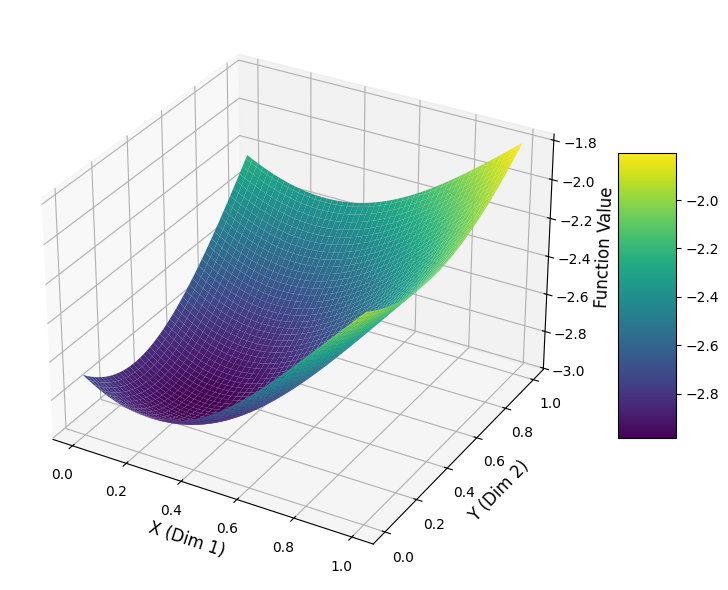

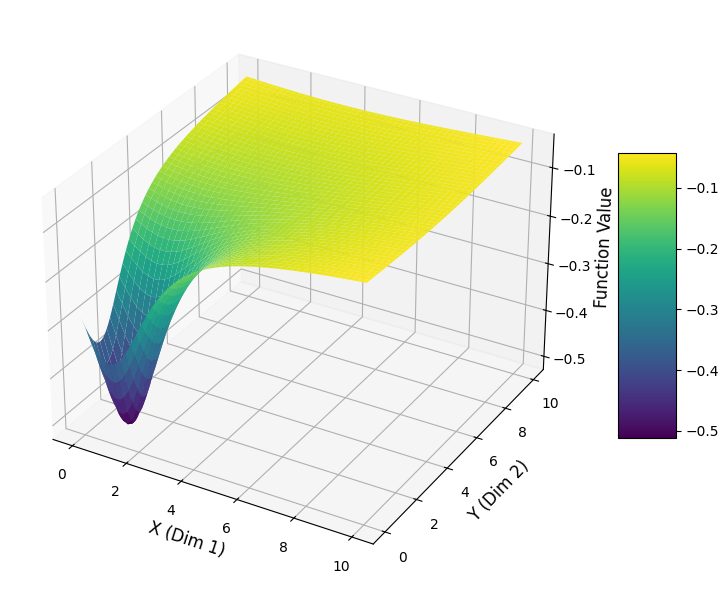

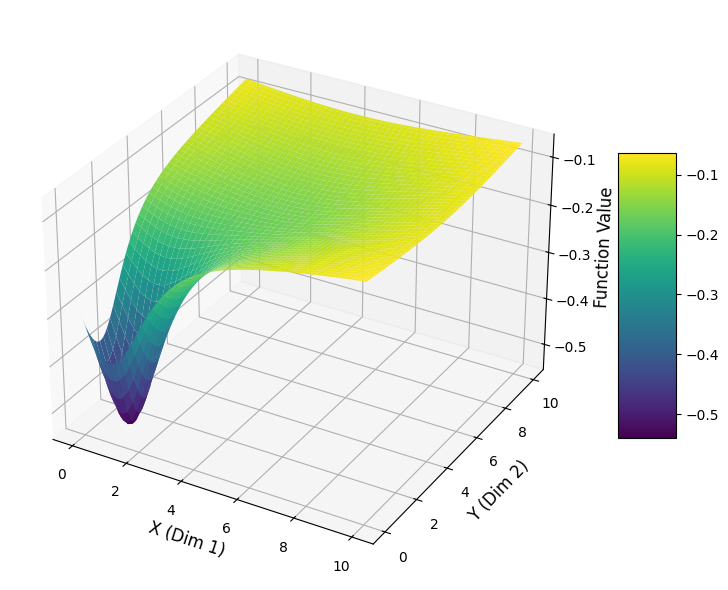

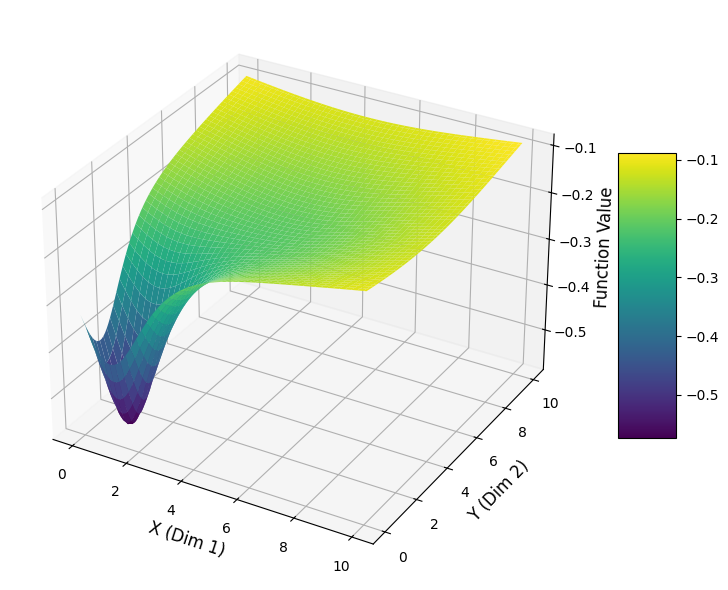

In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Set Matplotlib style to default for compatibility
plt.style.use('default')

# Define font sizes for labels
FONT_SIZE_LABEL = 12

# Base folder for saving plots
base_dir = "qualitative_results"

# Define the 23 functions (from the provided code)
FUNCTIONS = {
    'Sphere': (lambda x: np.sum(x**2), [-100, 100], 0.0),
    'Schwefel_2_22': (lambda x: np.sum(np.abs(x)) + np.prod(np.abs(x)), [-10, 10], 0.0),
    'Schwefel_1_2': (lambda x: np.sum([np.sum(x[:i+1])**2 for i in range(len(x))]), [-100, 100], 0.0),
    'Schwefel_2_21': (lambda x: np.max(np.abs(x)), [-100, 100], 0.0),
    'Rosenbrock': (lambda x: np.sum([100 * (x[i+1]-x[i]**2)**2 + (1-x[i])**2 for i in range(len(x)-1)]), [-30, 30], 0.0),
    'Step': (lambda x: np.sum(np.floor(x+0.5)**2), [-100, 100], 0.0),
    'Quartic': (lambda x: np.sum([(i+1)*xi**4 for i, xi in enumerate(x)]) + np.random.uniform(0, 1), [-1.28, 1.28], 0.0),
    'Schwefel_2_26': (lambda x: 418.9829*len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x)))), [-500, 500], 0.0),
    'Rastrigin': (lambda x: 10 * len(x) + np.sum(x**2 - 10*np.cos(2*np.pi*x)), [-5.12, 5.12], 0.0),
    'Ackley': (lambda x: -20 * np.exp(-0.2*np.sqrt(np.sum(x**2)/len(x))) - np.exp(np.sum(np.cos(2*np.pi*x))/len(x)) + 20 + np.e, [-32, 32], 0.0),
    'Griewank': (lambda x: np.sum(x**2)/4000 - np.prod(np.cos(x/np.sqrt(np.arange(1, len(x)+1)))) + 1, [-600, 600], 0.0),
    'Penalized': (lambda x: (np.pi/len(x))*(10*np.sin(np.pi*(1+(x[0]+1)/4))**2 +
                               np.sum([((1+(x[i]+1)/4)-1)**2 * (1+10*np.sin(np.pi*(1+(x[i+1]+1)/4))**2)
                                       for i in range(len(x)-1)]) +
                               ((1+(x[-1]+1)/4)-1)**2) +
                              np.sum([100*(xi-10)**4 if xi>10 else (-10-xi)**4 if xi < -10 else 0 for xi in x]),
                  [-50, 50], 0.0),
    'Penalized2': (lambda x: 0.1*(np.sin(3*np.pi*x[0])**2 +
                                 np.sum([(x[i]-1)**2 * (1+np.sin(3*np.pi*x[i+1])**2)
                                         for i in range(len(x)-1)]) +
                                 (x[-1]-1)**2 * (1+np.sin(2*np.pi*x[-1])**2)) +
                                np.sum([0.1*(xi-5)**4 if xi>5 else (-5-xi)**4 if xi<-5 else 0 for xi in x]),
                   [-50, 50], 0.0),
    'Foxholes': (lambda x: 1.0 / (1/500.0 + sum(1.0 / (j + 1 + (x[0] - 4.0)**6 + (x[1] - np.linspace(0, 12, 25)[j])**6) for j in range(25))), [-65.536, 65.536], 0.998),
    'Kowalik': (lambda x: sum((0.1957 - (x[0]*(b**2 + b*x[1]) / (b**2 + b*x[2] + x[3]*x[2])))**2 for b in [4, 2, 1, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625]), [-5, 5], 0.0003075),
    'Camel-Back': (lambda x: 4*x[0]**2 - 2.1*x[0]**4 + (1/3)*x[0]**6 + x[0]*x[1] - 4*x[1]**2 + 4*x[1]**4, [-5, 5], -1.0316),
    'Branin': (lambda x: (x[1] - (5.1/(4*np.pi**2))*x[0]**2 + (5/np.pi)*x[0] - 6)**2 + 10*(1-(1/(8*np.pi)))*np.cos(x[0]) + 10, [-5, 5], 0.398),
    'Goldstein-Price': (lambda x: (1 + (x[0] + x[1] + 1)**2 * (19 - 14*x[0] + 3*x[1] - 14*x[1] + 6*x[0]*x[1] + 3*x[1]**2)) *
                                (30 + (2*x[0] - 3*x[1])**2 * (18 - 32*x[0] + 12*x[1] + 48*x[0] - 36*x[0]*x[1] + 27*x[1]**2)), [-2, 2], 3.0),
    'Hartman': (lambda x: -sum(alpha * np.exp(-np.sum(A[i] * ((x[:3] - P[i])**2))) for i, alpha in enumerate([1.0, 1.2, 3.0, 3.2])
                                for A in [np.array([[3.0, 10, 30], [0.1, 10, 35], [3.0, 10, 30], [0.1, 10, 35]])]
                                for P in [1e-4 * np.array([[3689, 1170, 2673], [4699, 4387, 7470], [1091, 8732, 5547], [381, 5743, 8828]])]), [0, 1], -3.86),
    'Shekel1': (lambda x: -sum(1.0 / (np.sum((x[:6] - A[i])**2) + 0.1) for i in range(4)
                                for A in [1e-4 * np.array([[1312, 1696, 5569, 124, 8283, 5886],
                                                           [2329, 4135, 8307, 3736, 1004, 9991],
                                                           [2348, 1451, 3522, 2883, 3047, 6650],
                                                           [4047, 8828, 8732, 5743, 1091, 381]])]), [0, 1], -3.322),
    'Shekel2': (lambda x: -sum(1.0 / (np.sum((x[:4] - A[i])**2) + 0.1) for i in range(5)
                                for A in [np.array([[4, 4, 4, 4], [1, 1, 1, 1], [8, 8, 8, 8], [6, 6, 6, 6], [3, 7, 3, 7]])]), [0, 10], -10.1532),
    'Shekel3': (lambda x: -sum(1.0 / (np.sum((x[:4] - A[i])**2) + 0.1) for i in range(7)
                                for A in [np.array([[4, 4, 4, 4], [1, 1, 1, 1], [8, 8, 8, 8], [6, 6, 6, 6], [3, 7, 3, 7], [2, 9, 2, 9], [5, 5, 3, 3]])]), [0, 10], -10.4028),
    'Shekel4': (lambda x: -sum(1.0 / (np.sum((x[:4] - A[i])**2) + 0.1) for i in range(10)
                                for A in [np.array([[4, 4, 4, 4], [1, 1, 1, 1], [8, 8, 8, 8], [6, 6, 6, 6], [3, 7, 3, 7],
                                                    [2, 9, 2, 9], [5, 5, 3, 3], [8, 1, 8, 1], [6, 2, 6, 2], [7, 3.6, 7, 3.6]])]), [0, 10], -10.5363)
}

# Go through each function
for func_name, (func, bounds, optimum) in FUNCTIONS.items():
    func_path = os.path.join(base_dir, func_name)
    if not os.path.isdir(func_path):
        print(f"Directory not found for {func_name}, skipping...")
        continue

    try:
        # Create a grid for the first two dimensions
        x = np.linspace(bounds[0], bounds[1], 100)
        y = np.linspace(bounds[0], bounds[1], 100)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)

        # Compute function values
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                # Create input vector (fix other dimensions to 0)
                input_vec = np.zeros(30)  # Max dimension from Config.DIM = 30
                input_vec[0] = X[i, j]
                input_vec[1] = Y[i, j]
                # For low-dimensional functions, use only required dimensions
                if func_name in ['Foxholes', 'Camel-Back', 'Branin', 'Goldstein-Price']:
                    input_vec = input_vec[:2]
                elif func_name == 'Hartman':
                    input_vec = input_vec[:3]
                elif func_name in ['Kowalik', 'Shekel2', 'Shekel3', 'Shekel4']:
                    input_vec = input_vec[:4]
                elif func_name == 'Shekel1':
                    input_vec = input_vec[:6]
                Z[i, j] = func(input_vec)

        # Create 3D surface plot
        fig = plt.figure(figsize=(8, 6), dpi=100)
        ax = fig.add_subplot(111, projection='3d')
        surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
        ax.set_xlabel("X (Dim 1)", fontsize=FONT_SIZE_LABEL)
        ax.set_ylabel("Y (Dim 2)", fontsize=FONT_SIZE_LABEL)
        ax.set_zlabel("Function Value", fontsize=FONT_SIZE_LABEL)
        fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)

        # Save plot
        plot_path = os.path.join(func_path, f"{func_name}_function.png")
        plt.tight_layout()
        plt.savefig(plot_path, dpi=300, bbox_inches='tight', format='png')
        plt.show()
        plt.close(fig)

    except Exception as e:
        print(f"Error in {func_name}: {e}")